This jupyter notebook provides the code stumps for the exam questions.

Flow-ID: 13

## Question 1: Profit Optimization for Hotel Room Sales

Task A


In [69]:
# 1 demand function
# specifying the demand function as in the assignment, and casting it to int() to ensure integer demand
def demand(p):
    return int(1000 - 2.2 * p)

In [78]:
demand(101)

777

In [70]:
# 2 revenue function
# Specifying revenue function as price times demand for given price
def revenue(p):
    return p * demand(p)

In [79]:
revenue(101)

78477

In [71]:
# 3 total cost function
# defining the total cost function for cost given number of rooms booked and fee
def total_cost(n):
    if n < 60:
        return n * 50
    elif n <= 100:
        return n * 40
    elif n <= 150:
        return n * 40 + 20000
    elif n > 150:
        return n * 30 + 20000


In [99]:
# testing the cost function, with the demand of price 101, since i assume the demand defines the number of rooms booked
total_cost(demand(101)) # seems to work correctly

43310

Task b

In [100]:
# profit function

def profit(p):
    return revenue(p) - total_cost(demand(p))

In [101]:
profit(101) # testing the profit function - seems correct

35167

## Question 2: Hotel Reservation Management

Task A

In [92]:
# Creating the dictionaries with some numbers random numbers.

hotel = {
    'rooms_available'   : 100,
    'adr_threshold'     : 100,
    'bookings'          : []    # i specify bookings as an empty list, in order for it to append the reservations to this.
}

reservations = {
    'rooms'             : 2,
    'adr'               : 100,
    'id'                : 1,
}

In [93]:
# defining the process_reservation function of hotel and reservation

def process_reservation(hotel, reservation):

    # implementing the logic from the assignment if only adr is greater than or equal to adr threshold,
    # and reservation rooms is less than or equal to rooms available, the reservation will be appended to the booking list, 
    # and the rooms available will be decreased by the booked rooms.
    if reservation['adr'] >= hotel['adr_threshold'] and reservation['rooms'] <= hotel['rooms_available']:
        hotel['bookings'].append(reservation)
        hotel['rooms_available'] = hotel['rooms_available'] - reservation['rooms']
    
    return hotel

In [94]:
process_reservation(hotel, reservations) # use function on the created dictionaries
print(hotel)

# seems that the function works correctly, rooms available decrease by 2 and the booking has been appended to the bookings list.

{'rooms_available': 98, 'adr_threshold': 100, 'bookings': [{'rooms': 2, 'adr': 100, 'id': 1}]}


Task B

could not quite figure out how to extend the function

## Question 3

The dataset is provided in the `data.csv` file.

Task A

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv('data.csv') # Read in the data
df.head() # inspect first few rows

,date,adr,room_type,num_rooms,location,month
0,2023-01-01,157,single,3,Copenhagen,1
1,2023-01-01,474,suite,1,Copenhagen,1
2,2023-01-01,442,suite,1,New York,1
3,2023-01-01,141,single,3,Copenhagen,1
4,2023-01-01,200,single,3,New York,1


In [7]:
df.info() # Inspecting the data types and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       7300 non-null   object
 1   adr        7300 non-null   int64 
 2   room_type  7300 non-null   object
 3   num_rooms  7300 non-null   int64 
 4   location   7300 non-null   object
 5   month      7300 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 342.3+ KB


In [9]:
df.describe() # I use the describe function to get some descriptive statistics for the numerical columns

# We can see that mean adr is 240.9, the standard deviation for adr is 119.9
# for num_rooms the mean is approx 3 and the std is 1.42
# for month the mean is 6.53 and the std is 3.45

,adr,num_rooms,month
count,7300.000000,7300.000000,7300.000000
mean,240.867945,2.996575,6.526027
std,119.865884,1.415613,3.448088
min,44.000000,1.000000,1.000000
25%,148.000000,2.000000,4.000000
50%,222.000000,3.000000,7.000000
75%,310.000000,4.000000,10.000000
max,716.000000,5.000000,12.000000


In [12]:
# To inspect the median of the numerical columns we use the median function

df[['adr', 'num_rooms', 'month']].median()
# and we see that the median of the columns are respectively 222, 3, and 7.

adr          222.0
num_rooms      3.0
month          7.0
dtype: float64

<Axes: xlabel='room_type', ylabel='Count'>

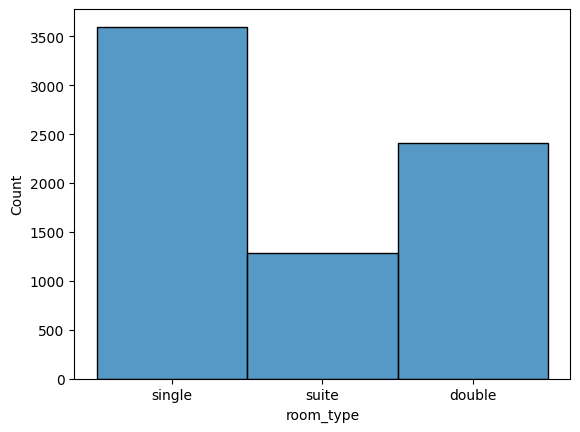

In [14]:
# Distribution of different room types and location
import seaborn as sns

sns.histplot(x='room_type', data=df)
# I use the seaborn histplot to view the distribution of different room types.
# we see that there are most single type rooms, around 3500
# The second most is double type rooms with approx 2500
# Lastly, we have suite with approx 1250 

In [18]:
df['room_type'].value_counts()
# Alternatively i use the value_counts function to get the exacts number of different room types

room_type
single    3599
double    2414
suite     1287
Name: count, dtype: int64

location
New York      3612
Copenhagen    2185
Berlin        1503
Name: count, dtype: int64


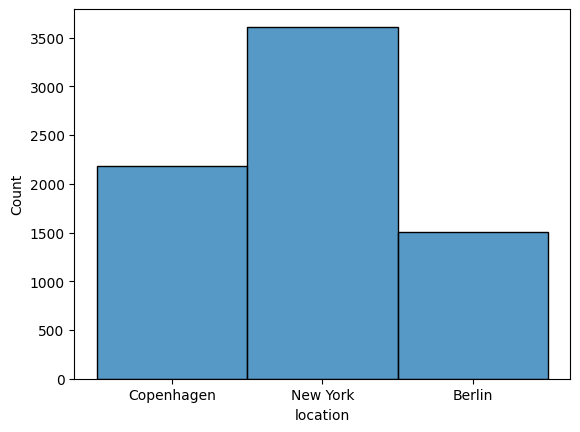

In [20]:
# inspect distribution of location
sns.histplot(x='location', data=df)

# we can see that most instances have location of New York, second most Copenhagen, and lastly Berlin
print(df['location'].value_counts()) # to see the exact number of instances for the locations

In [23]:
df['date'] = pd.to_datetime(df['date']) # changing date to a datetime type

<Axes: xlabel='date', ylabel='num_rooms'>

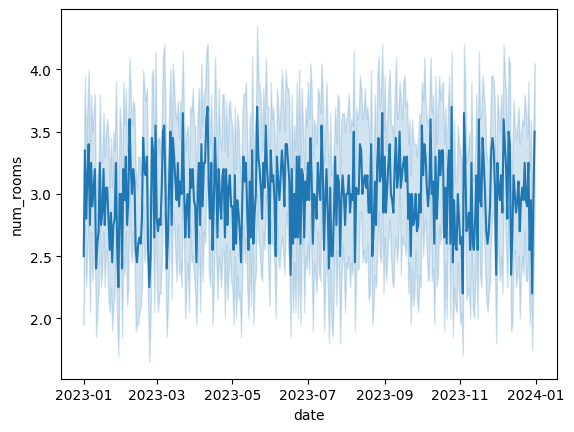

In [24]:
# Any interesting patterns over time

sns.lineplot(data=df, x='date', y='num_rooms')
# We can see that number of rooms booked is somewaht stable throughout the period, mostly in the level between 2.5 and 3.5

<Axes: xlabel='date', ylabel='adr'>

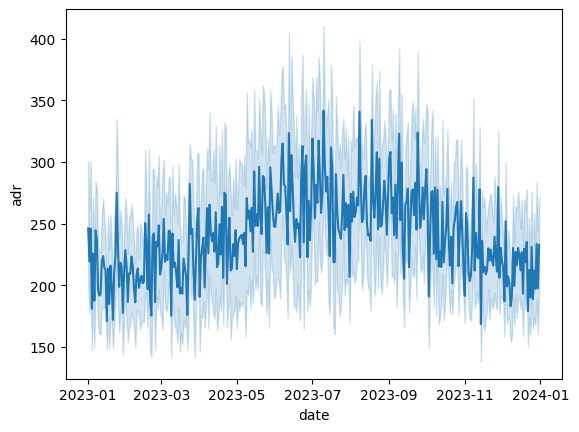

In [25]:
sns.lineplot(data=df, x='date', y='adr')
# adr seems to increase throughout the first half of the period, and then seems to decrease throughout the second half of the period

In [31]:
# group data by location and room type and present grouped summaries
df.groupby(['location', 'room_type'])['adr'].describe()
# inspecting the desprictive statistics for adr grouped by location and room type

count        mean         std    min     25%    50%  \
location   room_type                                                         
Berlin     double      276.0  169.601449   46.712123   87.0  131.75  168.0   
           single     1075.0  100.313488   31.612460   44.0   74.00  100.0   
           suite       152.0  305.447368   70.589832  173.0  253.50  299.0   
Copenhagen double      693.0  222.253968   59.369755  115.0  179.00  215.0   
           single     1066.0  152.466229   39.593584   76.0  123.25  146.0   
           suite       426.0  376.708920   96.617985  202.0  302.50  371.5   
New York   double     1445.0  303.606228   73.086651  161.0  248.00  296.0   
           single     1458.0  225.054870   54.368160  122.0  183.00  222.0   
           suite       709.0  442.018336  105.664876  244.0  364.00  428.0   

                         75%    max  
location   room_type                 
Berlin     double     206.00  282.0  
           single     123.00  172.0  
           suite      361.25  458.0  
Copenhagen double     259.00  374.0  
           single     181.00  246.0  
           suite      443.00  619.0  
New York   double     353.00  479.0  
           single     264.00  356.0  
           suite      515.00  716.0

In [35]:
df.groupby(['location', 'room_type']).agg(['count','mean', 'min', 'max'])

# Alternatively we can inspect the count, mean, min, max (and other types of descriptives), 
# for all the other columns, grouped by location and room type

date                                           \
                     count                          mean        min   
location   room_type                                                  
Berlin     double      276 2023-06-28 10:52:10.434782720 2023-01-02   
           single     1075 2023-06-29 06:49:53.860465152 2023-01-01   
           suite       152 2023-07-09 04:53:41.052631552 2023-01-01   
Copenhagen double      693 2023-06-30 13:26:14.025974016 2023-01-01   
           single     1066 2023-07-07 23:55:56.848030208 2023-01-01   
           suite       426 2023-06-30 00:40:33.802817024 2023-01-01   
New York   double     1445 2023-06-29 07:08:30.726643712 2023-01-01   
           single     1458 2023-07-05 02:16:17.777777664 2023-01-01   
           suite       709 2023-06-28 16:08:48.067700992 2023-01-01   

                                  adr                       num_rooms  \
                            max count        mean  min  max     count   
location   room_type                                                    
Berlin     double    2023-12-31   276  169.601449   87  282       276   
           single    2023-12-31  1075  100.313488   44  172      1075   
           suite     2023-12-31   152  305.447368  173  458       152   
Copenhagen double    2023-12-31   693  222.253968  115  374       693   
           single    2023-12-31  1066  152.466229   76  246      1066   
           suite     2023-12-31   426  376.708920  202  619       426   
New York   double    2023-12-31  1445  303.606228  161  479      1445   
           single    2023-12-31  1458  225.054870  122  356      1458   
           suite     2023-12-31   709  442.018336  244  716       709   

                                       month                    
                          mean min max count      mean min max  
location   room_type                                            
Berlin     double     2.876812   1   5   276  6.380435   1  12  
           single     3.049302   1   5  1075  6.445581   1  12  
           suite      3.085526   1   5   152  6.756579   1  12  
Copenhagen double     3.033189   1   5   693  6.483405   1  12  
           single     3.000000   1   5  1066  6.713884   1  12  
           suite      2.960094   1   5   426  6.464789   1  12  
New York   double     3.004844   1   5  1445  6.443599   1  12  
           single     2.972565   1   5  1458  6.624829   1  12  
           suite      2.957687   1   5   709  6.416079   1  12

Task B

In [37]:
# define a demand function for booking, of location, adr, and room type

def booking_demand(df, location, adr, room_type):

    # Filtering the df to the specific information given to the function
    filtered_df = df[(df['location'] == location) & (df['adr'] >= adr) & (df['room_type'] == room_type)]

    # Summing num_rooms for the filtered df
    total_num_rooms = filtered_df['num_rooms'].sum()

    return total_num_rooms


In [82]:
# populate dataframe for range of adr values for each location and room type

adr_range = range(50, 601) # specifying the adr range of values from 50 to 600

# I specify the unique values of the locations and room_types
locations_unique = df['location'].unique()
room_types_unique = df['room_type'].unique()

# initiliaze an empty list to later store results in
results = []

# I create a for loop that iterates through location in unique locations, room_type in unique room types and adr in the specified adr range
for location in locations_unique:
    for room_type in room_types_unique:
        for adr in adr_range:

            # Next we specify total number of rooms, which uses the booking_demand function given the information for the variables
            total_num_rooms = booking_demand(df, location, adr, room_type)

            # I append the results of the booking_demand function to the result list
            results.append([location, room_type, adr, total_num_rooms])

# I specify the results list as a panda dataframe, with the column names as the true names of the original df
df_demand = pd.DataFrame(results, columns=['location', 'room_type', 'adr', 'total_num_rooms'])


In [42]:
df_demand # inspecting the new df_demand dataframe
# we see that for low adr it seems that all single rooms in copenhagen are booked
# and high adr, no bookings in berlin

,location,room_type,adr,total_num_rooms
0,Copenhagen,single,50,3198
1,Copenhagen,single,51,3198
2,Copenhagen,single,52,3198
3,Copenhagen,single,53,3198
4,Copenhagen,single,54,3198
...,...,...,...,...
4954,Berlin,double,596,0
4955,Berlin,double,597,0
4956,Berlin,double,598,0
4957,Berlin,double,599,0


<Axes: xlabel='adr', ylabel='total_num_rooms'>

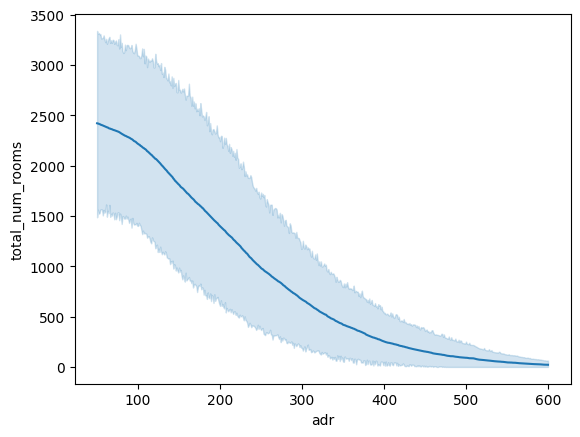

In [43]:
# plotting the total number of rooms 
sns.lineplot(data=df_demand, x='adr', y='total_num_rooms')
# We can see that the total number of booked rooms decreases as the adr goes up,
# which makes sense, because the lower the adr, the more demand for bookings.

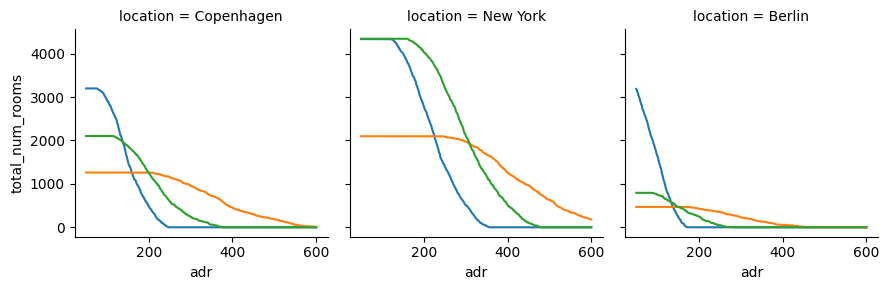

In [44]:
# Create seperate plots for location

g = sns.FacetGrid(df_demand, col="location") # specify col to location, which create a column for each location
g.map_dataframe(sns.lineplot, x = 'adr', y='total_num_rooms', hue='room_type');

# sad that my hue doesnt display what color is what type of room..
# But the different location follow similar type of trend, where total number of rooms is highest for low adr,
# and then it decreases as adr increases.

Task C - reflection

It might be difficult to get your hands on such kind of data, becuase companies probably prefer to keep valuable data like booking data to themselves, in order not to let competitors get any insights in their bookings.
An approach to get something similar is to do web scraping of different booking sites, but it would be difficult to capture the aspect of booking requests. One could maybe web scrape a booking website continously and keep track of which listings are booked.

## Question 4

The code for this question is not meant to be run and is therefore only included as an image.

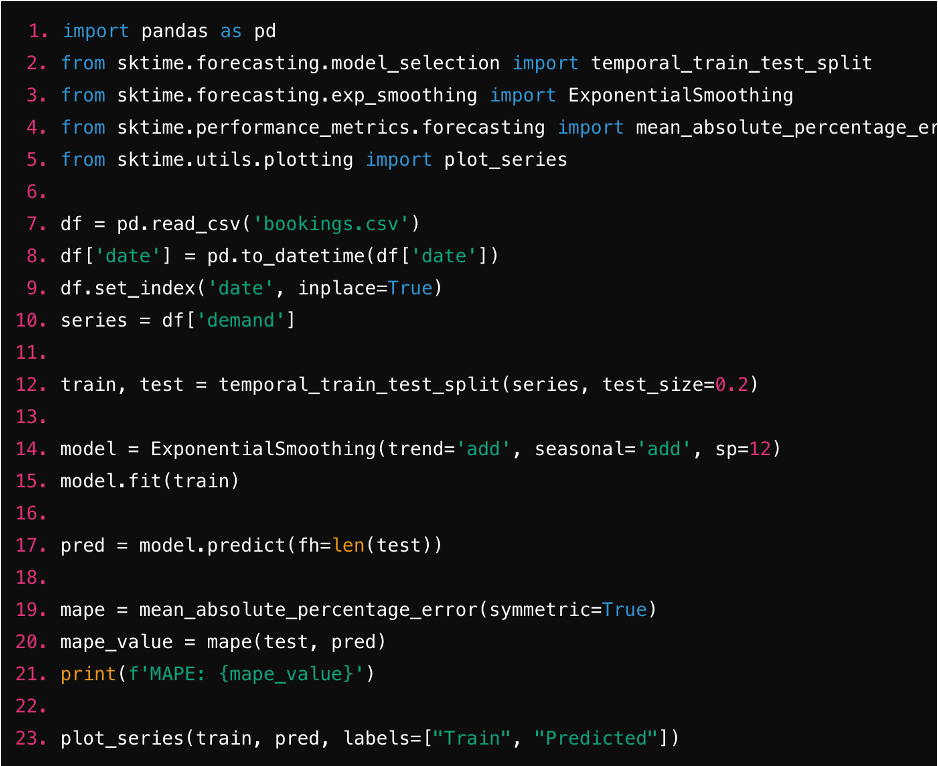

Task A - explain the lines of code

line 9:
In line 9, the use of .set_index, sets the index to the date column, which overrites the default python index. inplace=true means that it modifies the existing dataframe instead of creating a new one. 

line 12:
In line 12 the time series data is split into train and test split, which is usefull in order to train and evaluate a time series model. The test size is set to 0.2, which means 20% of the data will be test data and 80% train data

line 14:
Specifies the model to be used as an exponential smoothing model, where trend and seasonality is of additive aspect, and seasonal periods is set to 12.

line 15:
Fits the exponential smoothing model to the training data

line 17:
using the exponential smoothing model to predict on the test set, and storing the results in pred

line 19, 20:
defines mape to use the mean_average_percentage_error and calculates the mape based on the true test data and the predictions from before

line 23:
plots the time series of the true training data and the prediction for the forecasting horizon and naming them.

Task B - causal forecasting

The exponential smoothing model calculates the forecast as kind of a weighted average based of recent true observations and recent forecast, where alpha determines the weight given to past observations and recent forecasts.
It does not factor in any external factors, it only uses the time series data to provide its forecast.

This reduces the complexity of the forecast, that it cannot account for external factors, like holiday and special events. Which could hold valuable information about the demand, and could potentially provide a better forecast if these factors where incorporated.


Task C - alternative approach

Associative models can incorporate external factors like holiday and special events, unlike dynamic approaches like exponential smoothing.
It involves feature engineering auxiliary data into usable data for the model to use. This seems like it is already done in this case, with holiday and special events noted by a 1.

This does come with some limitations in terms of the feature engineering, since you could imagine that you in some cases might not know the special events in the future. And in some cases, a more complex models with more features is not always going to be the better model, but might instead confuse the model.

This is more in lane of machine learning models. Models that could be used in this scenario could be multiple linear regression, decision trees and random forest regression and so on. 
These are all to be found in the sklearn (scikit-learn) package. 
For example RandomForestRegressor or DecisionTreeRegressor from the sklearn package.

## Question 5

In [55]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 30 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1

Task A - explain demand functions

The demand function iterates through treatment in treatments and stores the treatment as a dictionary, and it then iterates through price in price range, which ranges from 10 to 100, with intervals of 10 (10, 20, 30...).
It then calculates the demand for each treatment at each pricelevel as the maximum of a_values of treatment times the pricelevel to the exponential power of negative b_values for treatment, and returns the greates value of this calculation and 0.

It cannot be used directly in the revenue function since the demand function is exponential because of the exponential term in it, and therefore not linear, which is an assumption for linear programming.


Task B - describe optimization logic

Decision variables: The decision variable are the treatment and the price ranges, which is specified in the price vars variable dictionary.

Objective function: The objective function is the "Prob", which specifies sum of the treatment and price in price_vars times the demand for treatment and price times the price, it then iterates through each treatment in treatments and price in price range.

Constraints: There are two constraints. The first one is the sum of treatment and price in price_vars for each price in price range is equal to 1. This makes sure that only 1 price can be chosen for each treatment

The next constraint ensures that the given treatment, price, and demand for this, times the resource usage, does not exceed the capacity of resources.

Task C

In [56]:
# Changed the ressource capacity to 30 in above code
# Print the prices for the treatments in the optimal solution
for i in prob.variables():
    if i.varValue > 0:
        print(f"{i.name} : {i.varValue}")

# the optimal prices are those equal to 1, why we want varValue > 0.
# The optimal solution is found using price of 100 for aromatherapy, 90 for basic messsage, and 100 for deep tissue massage.

Aromatherapyprice_100 : 1.0
Basic_Massageprice_90 : 1.0
Deep_Tissue_Massageprice_100 : 1.0


In [57]:
print(prob.objective.value()) # Print profit of the problem
# The optimal solution gives a profit of 1356.23

1356.2300531569465


Task D - for different ressources

Added capacity as an numpy arange, and changed constraint 2 to loop through the ressource arange

In [59]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = np.arange(20, 101, 10) # new ressource capacity range

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
for ressource in total_resource_capacity: # added the constraint 2 to iterate through each ressourch in the capacity arange
    prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= ressource

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))

-1

In [62]:
print(LpStatus[prob.status])
# the solution turns out to be infeasable - maybe i did something wrong in the constraint block 2 since it is infeasible

Infeasible


Could not figure out how to plot my profit and demand for each treatment.